In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

import warnings
warnings.filterwarnings("ignore")

### Reading and Understanding the Data

In [2]:
# Reading the csv file. 
df = pd.read_csv('Country-data.csv')
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
# data inspection 
df.shape

(167, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [5]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [6]:
# checking the null values  - no missing values found
df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [7]:
# Checking data types 
df.dtypes

country        object
child_mort    float64
exports       float64
health        float64
imports       float64
income          int64
inflation     float64
life_expec    float64
total_fer     float64
gdpp            int64
dtype: object

In [8]:
# Converting exports, imports and health  percentages to absolute values.
df['exports'] = df['exports'] * df['gdpp']/100
df['imports'] = df['imports'] * df['gdpp']/100
df['health'] = df['health'] * df['gdpp']/100

df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


##  Exploratory Data Analysis

In [9]:
df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [10]:
f = df.columns[1:]
list(enumerate(f))

[(0, 'child_mort'),
 (1, 'exports'),
 (2, 'health'),
 (3, 'imports'),
 (4, 'income'),
 (5, 'inflation'),
 (6, 'life_expec'),
 (7, 'total_fer'),
 (8, 'gdpp')]

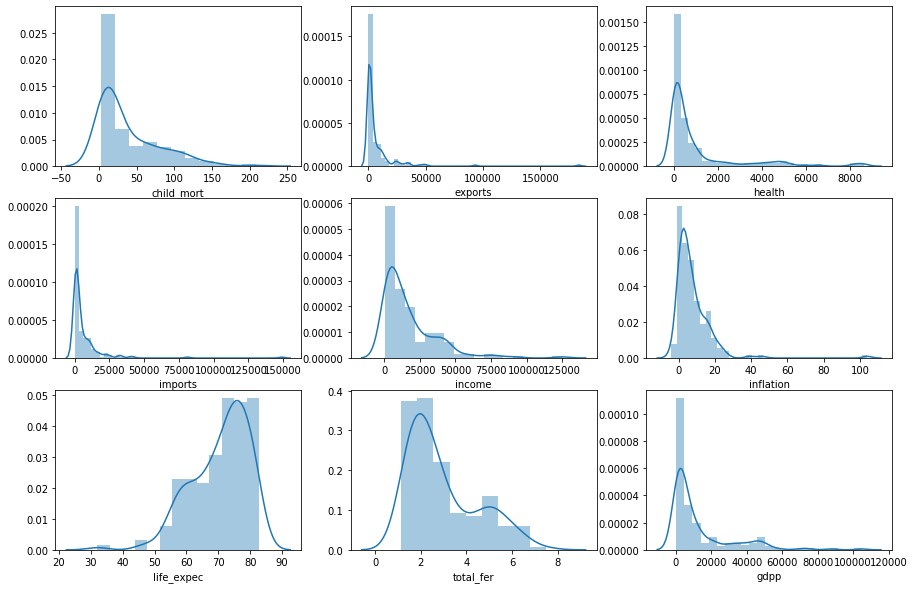

In [11]:
# Ploting distplot 
plt.figure(figsize = (15,10))
for i in enumerate(f):
    plt.subplot(3,3,i[0]+1)
    sns.distplot(df[i[1]])

#### Inference:
- There is normal distribution for columns exports, health, imports, inflation.
- Columns like child_mort,income,total_fer,gdpp can be helpfull to perform cluster profiling. 

###### PLotting all Top 10 Countries  for each factor.

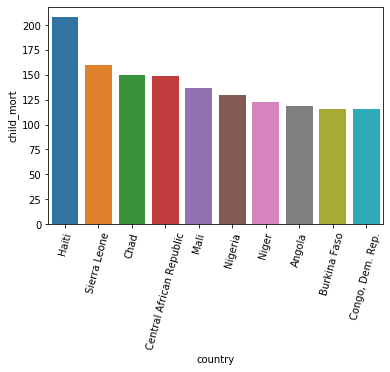

In [12]:
# Child Mortality Rate: Death of children under 5 years of age per 1000 live births.

child_mort = df[['country','child_mort']].sort_values('child_mort', ascending = False).head(10)
plt1 = sns.barplot(x='country', y='child_mort', data= child_mort)
plt.xticks(rotation =75)
plt.show()

# Inference: The country which has the highest Child Mortality Rate is Haiti means with poorest health care facility. 

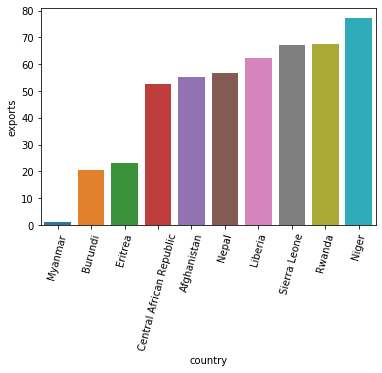

In [13]:
# exports: Exports of goods and services per capita. 

exports = df[['country','exports']].sort_values('exports', ascending = True).head(10)
sns.barplot(x='country', y='exports', data= exports)
plt.xticks(rotation =75)
plt.show()

# Inference: Developing countries /underdeveloped  countries are in Top 10 lowest Exports of goods and services per capita.

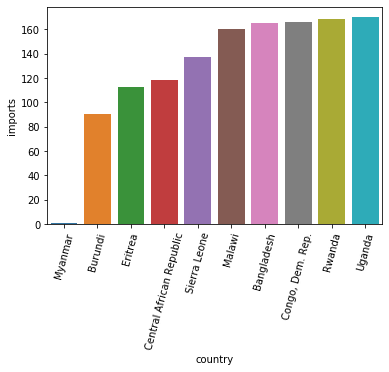

In [14]:
# imports: Imports of goods and services per capita. 

imports = df[['country','imports']].sort_values('imports', ascending = True).head(10)
sns.barplot(x='country', y='imports', data= imports)
plt.xticks(rotation =75)
plt.show()

# Inference: Top 10 countries who produce local goods are generally underdeveloped / developing countries who are poor to afford imports.

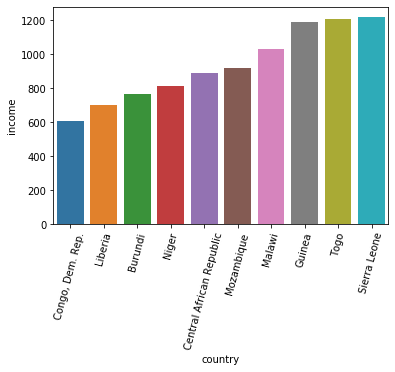

In [15]:
# Income: Net income per person
Income = df[['country','income']].sort_values('income', ascending = True).head(10)
sns.barplot(x='country', y='income', data= Income)
plt.xticks(rotation =75)
plt.show()

# Inference: Top 10 countries with poor Net income per person mostly from  Africa. 

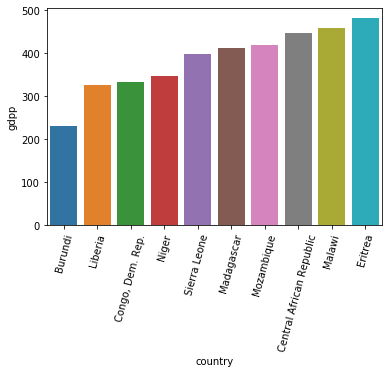

In [16]:
# GDP: The GDP per capita.

GDP = df[['country','gdpp']].sort_values('gdpp', ascending = True).head(10)
sns.barplot(x='country', y='gdpp', data= GDP)
plt.xticks(rotation =75)
plt.show()

# Inference: Top 10 countries with poor GDP from  Africa. 

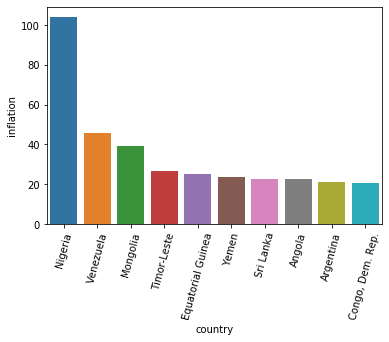

In [17]:
# Inflation: The measurement of the annual growth rate of the GDP deflator. 

inflation = df[['country','inflation']].sort_values('inflation', ascending = False).head(10)
sns.barplot(x='country', y='inflation', data= inflation)
plt.xticks(rotation =75)
plt.show()

# Inference: Top 10 Countries having highest Inflation are from countries with the nation's political and economic turmoil. 

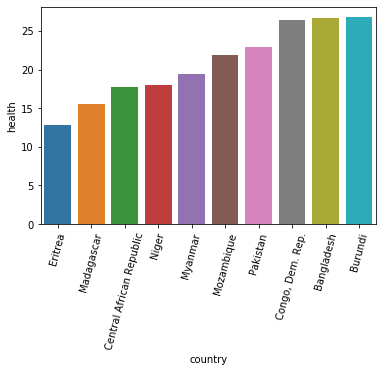

In [18]:
# Health :Total health spending per capita. 
Health = df[['country','health']].sort_values('health', ascending = True).head(10)
sns.barplot(x='country', y='health', data= Health)
plt.xticks(rotation =75)
plt.show()

# Inference:Top 10 Countries having lowest health spending are where per Capita income is very high. 

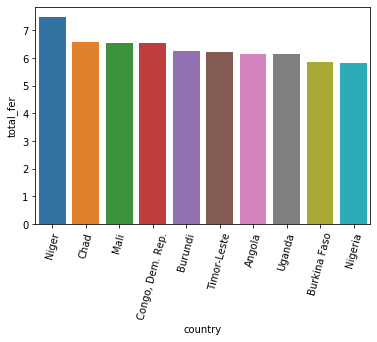

In [19]:
# Fertility Rate: The number of children that would be born to each woman if the current age-fertility rates remain the same.
Fertility_Rate = df[['country','total_fer']].sort_values('total_fer', ascending = False).head(10)
sns.barplot(x='country', y='total_fer', data= Fertility_Rate)
plt.xticks(rotation =75)
plt.show()

# Inference: Amoung the top 10 there are countris with high fertility rate but low GDP. 

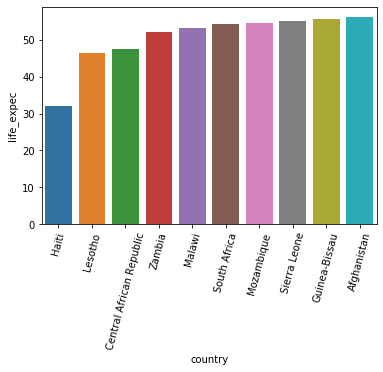

In [20]:
# Life Expectancy: The average number of years a new born child would live if the current mortality patterns are to remain the same.

life_expec = df[['country','life_expec']].sort_values('life_expec', ascending = True).head(10)
sns.barplot(x='country', y='life_expec', data= life_expec)
plt.xticks(rotation =75)
plt.show()

# Inference:Top 10 Countries having lowest Life Expectancy are countries where health care facilities are not good. 

## Outlier Analysis

In [21]:
# statistical summary of all the quantitative variables
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.618847,1056.733204,6588.352108,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,17973.885795,1801.408906,14710.810418,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,183750.000000,8663.600000,149100.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


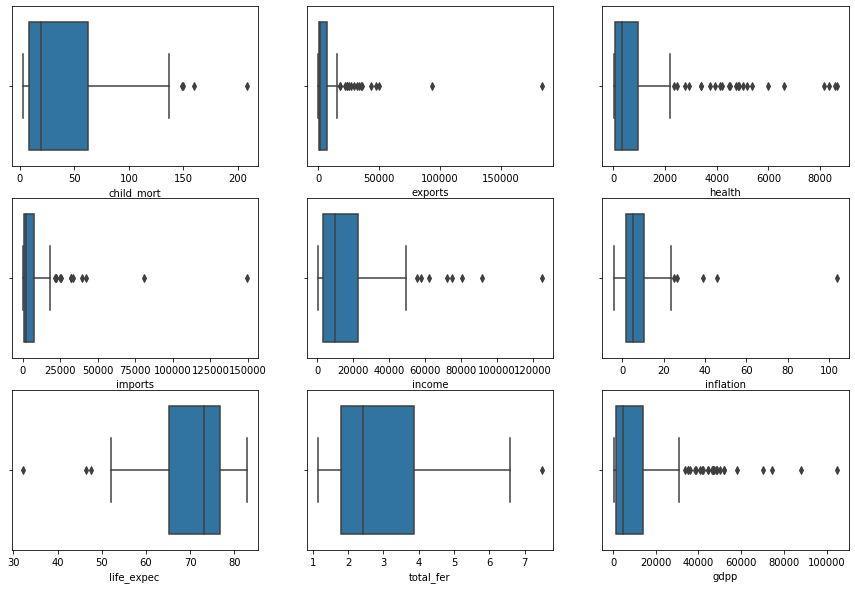

In [22]:
# To plot the box plot for all the columns
plt.figure(figsize = (15,10))
for i in enumerate(f):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(x = i[1], data =df)

###### There are outliers in every single variable

In [23]:
#  Outlier treatment by Percentile Capping. 

Q3 = df.child_mort.quantile(0.99)
Q1 = df.child_mort.quantile(0.01)
df['child_mort'][df['child_mort']<=Q1]=Q1
df['child_mort'][df['child_mort']>=Q3]=Q3

Q3 = df.total_fer.quantile(0.99)
Q1 = df.total_fer.quantile(0.01)
df['total_fer'][df['total_fer']<=Q1]=Q1
df['total_fer'][df['total_fer']>=Q3]=Q3

Q3 = df.gdpp.quantile(0.99)
Q1 = df.total_fer.quantile(0.01)
df['gdpp'][df['gdpp']<=Q1]=Q1
df['gdpp'][df['gdpp']>=Q3]=Q3

Q3 = df.health.quantile(0.99)
Q1 = df.health.quantile(0.01)
df['health'][df['health']<=Q1]=Q1
df['health'][df['health']>=Q3]=Q3

Q3 = df.income.quantile(0.99)
Q1 = df.income.quantile(0.01)
df['income'][df['income']<=Q1]=Q1
df['income'][df['income']>=Q3]=Q3


Q3 = df.inflation.quantile(0.99)
Q1 = df.inflation.quantile(0.01)
df['inflation'][df['inflation']<=Q1]=Q1
df['inflation'][df['inflation']>=Q3]=Q3

Q3 = df.life_expec.quantile(0.99)
Q1 = df.life_expec.quantile(0.01)
df['life_expec'][df['life_expec']<=Q1]=Q1
df['life_expec'][df['life_expec']>=Q3]=Q3

Q3 = df.exports.quantile(0.99)
Q1 = df.exports.quantile(0.01)
df['exports'][df['exports']<=Q1]=Q1
df['exports'][df['exports']>=Q3]=Q3


Q3 = df.imports.quantile(0.99)
Q1 = df.imports.quantile(0.01)
df['imports'][df['imports']<=Q1]=Q1
df['imports'][df['imports']>=Q3]=Q3

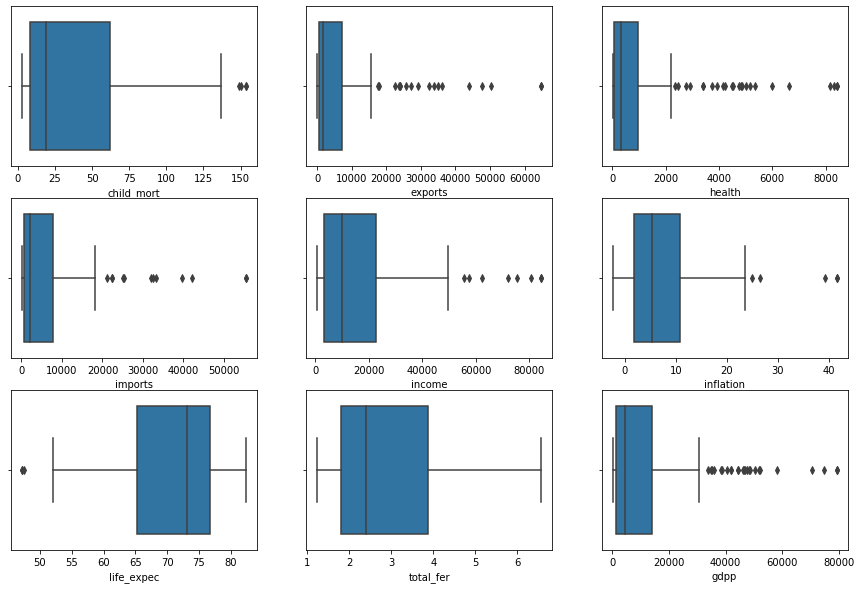

In [24]:
# checking the outliers again with using boxplot
plt.figure(figsize = (15,10))
for i in enumerate(f):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(x = i[1], data =df)

## Scaling

In [25]:
# numnerical variables for scaling 
df_num = df.drop("country", axis = 1)
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   child_mort  167 non-null    float64
 1   exports     167 non-null    float64
 2   health      167 non-null    float64
 3   imports     167 non-null    float64
 4   income      167 non-null    float64
 5   inflation   167 non-null    float64
 6   life_expec  167 non-null    float64
 7   total_fer   167 non-null    float64
 8   gdpp        167 non-null    float64
dtypes: float64(9)
memory usage: 11.9 KB


In [26]:
# rescaling
scaler = StandardScaler()

# fit_transform
df_scaled = scaler.fit_transform(df_num)
df_scaled.shape

(167, 9)

In [27]:
df_scaled

array([[ 1.34401227, -0.56963804, -0.56698288, ..., -1.69379898,
         1.92692802, -0.70225949],
       [-0.54754345, -0.47387318, -0.44041711, ...,  0.66305283,
        -0.86591134, -0.49872564],
       [-0.27254826, -0.42401465, -0.48629503, ...,  0.68650409,
        -0.03542674, -0.47743428],
       ...,
       [-0.3753502 , -0.49162206, -0.54027452, ...,  0.28783264,
        -0.66498765, -0.65869853],
       [ 0.47276581, -0.53996578, -0.55245405, ..., -0.36880269,
         1.15672052, -0.65869853],
       [ 1.16153882, -0.52703195, -0.54229642, ..., -2.18627548,
         1.64563484, -0.6500669 ]])

In [28]:
#Converting into  dataframe

df1 = pd.DataFrame(df_scaled)
df1.columns = ['child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp']
df1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.344012,-0.569638,-0.566983,-0.598844,-0.851772,0.263649,-1.693799,1.926928,-0.702259
1,-0.547543,-0.473873,-0.440417,-0.413679,-0.387025,-0.375251,0.663053,-0.865911,-0.498726
2,-0.272548,-0.424015,-0.486295,-0.476198,-0.221124,1.123260,0.686504,-0.035427,-0.477434
3,2.084186,-0.381264,-0.534113,-0.464070,-0.612136,1.936405,-1.236499,2.154642,-0.530950
4,-0.709457,-0.086754,-0.178431,0.139659,0.125202,-0.768917,0.721681,-0.544433,-0.032042


 ## Hopkins Test

In [29]:
#Checking the tendency of the data
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [30]:
# It is a good Hopkins score for Clustering. Above 90 %

hopkins(df.drop("country", axis = 1))

0.9026641766464573

## Model Building

### K- means Clustering




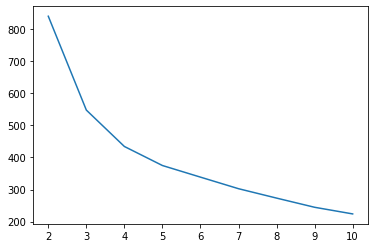

In [31]:
# Checking the best value for K 

# elbow curve
ssd = []
for k in range(2,11):
    kmean = KMeans(n_clusters = k).fit(df1)
    ssd.append([k, kmean.inertia_])

ssd = pd.DataFrame(ssd)
plt.plot(ssd[0], ssd[1])
plt.show()

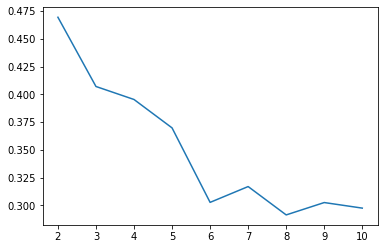

In [32]:
# silhouette analysis

ss = []
for k in range(2,11):
    kmeans = KMeans(n_clusters = k).fit(df1)
    ss.append([k, silhouette_score(df_scaled, kmeans.labels_)])
    
sil = pd.DataFrame(ss)
plt.plot(sil[0],sil[1])
plt.show()

##### After analysing with elbow curve and silhouette, final value of k  in both analysis is 3 

In [33]:
# Final KMeans with K == 3

kmean = KMeans(n_clusters = 3, random_state = 0)
kmean.fit(df1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [34]:
kmean.labels_

array([0, 1, 1, 0, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 0,
       1, 2, 1, 0, 0, 1, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 2, 1,
       2, 1, 1, 1, 1, 0, 0, 1, 1, 2, 2, 0, 0, 1, 2, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 2, 1, 1, 1, 0, 2, 1, 2, 1, 2, 1, 1, 0, 0, 2, 1, 0, 1, 1, 0,
       0, 1, 1, 2, 1, 0, 0, 1, 1, 0, 2, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       2, 2, 0, 0, 2, 1, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 2, 1, 2, 0, 0, 1, 2, 1, 1, 0, 1, 2, 2, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0])

In [35]:
# Assigning the label
df['cluster_id'] = kmean.labels_
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,1
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,1


In [36]:
# checking data points we have in each cluster
df.cluster_id.value_counts()

1    90
0    48
2    29
Name: cluster_id, dtype: int64

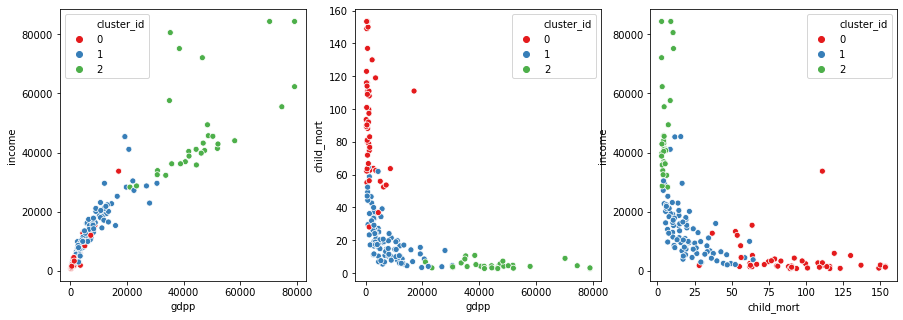

In [37]:
# Visualizing the clusters using scatter plot

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.scatterplot(x = 'gdpp', y ='income', hue = 'cluster_id', data =df, palette = 'Set1')
plt.subplot(1, 3, 2)
sns.scatterplot(x = 'gdpp', y ='child_mort', hue = 'cluster_id', data =df, palette = 'Set1')
plt.subplot(1, 3, 3)
sns.scatterplot(x ='child_mort' , y ='income', hue = 'cluster_id', data =df, palette = 'Set1')
plt.show()

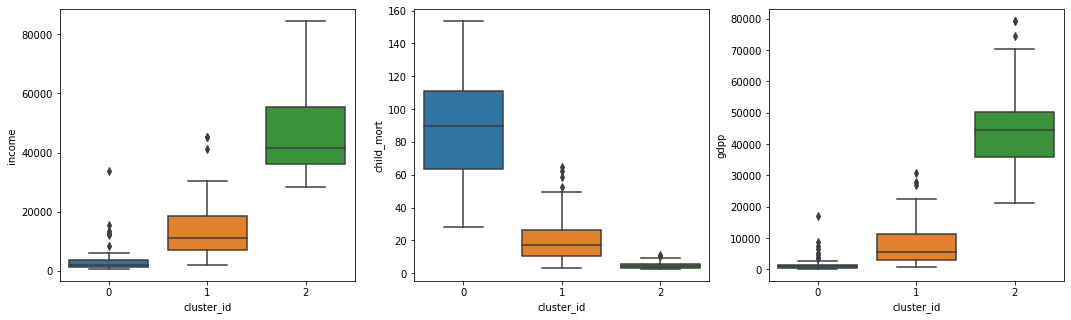

In [38]:
# Visualizing the clusters using box plot
plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
sns.boxplot(x='cluster_id', y='income', data=df)
plt.subplot(1, 3, 2)
sns.boxplot(x='cluster_id', y='child_mort', data=df)
plt.subplot(1, 3, 3)
sns.boxplot(x='cluster_id', y='gdpp', data=df)
plt.show()

In [39]:
# Cluster Profiling 
df[['gdpp','income','child_mort','cluster_id']].groupby('cluster_id').mean()

,gdpp,income,child_mort
cluster_id,,,
0,1909.208333,3901.010000,90.335417
1,7808.577778,13804.333333,20.547778
2,46068.137931,47784.413793,4.989655


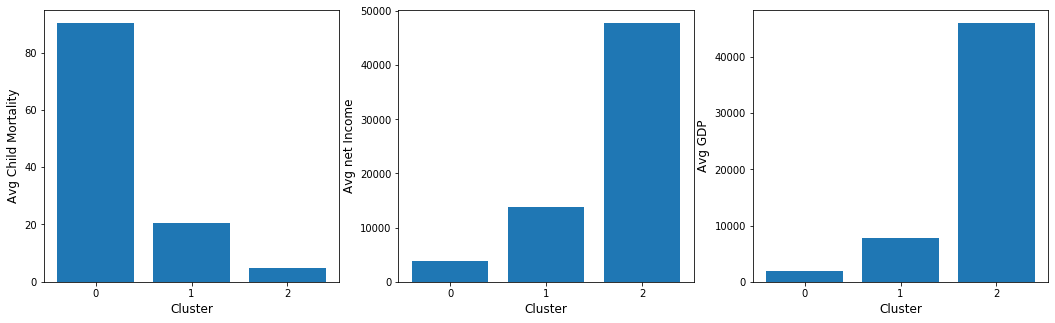

In [40]:
# visualizing with  barplot. 
country_means = df[['child_mort','income','gdpp','cluster_id']].groupby('cluster_id').mean().reset_index().round(2)
x = ['0','1','2']
plt.figure(figsize=(18, 5))
for col in enumerate([['child_mort','Avg Child Mortality'],['income','Avg net Income'],['gdpp','Avg GDP']]):
    plt.subplot(1,3,col[0]+1)
    plt.bar(country_means.cluster_id,country_means[col[1][0]])
    plt.xlabel('Cluster', fontdict={'fontsize': 12, 'fontweight' : 3, 'color' : 'black'})
    plt.ylabel(col[1][1], fontdict={'fontsize': 12, 'fontweight' : 3, 'color' : 'black'})
    plt.xticks(country_means.cluster_id.to_list(),x)
plt.show()

In [41]:
# cluster identified 0 

c = df[df['cluster_id']==0]
c.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,55.300,41.9174,248.297,1610.0,9.440,56.2,5.82,553.0,0
3,Angola,119.0,2199.190,100.6050,1514.370,5900.0,22.400,60.1,6.16,3530.0,0
17,Benin,111.0,180.404,31.0780,281.976,1820.0,0.885,61.8,5.36,758.0,0
21,Botswana,52.5,2768.600,527.0500,3257.550,13300.0,8.920,57.1,2.88,6350.0,0
25,Burkina Faso,116.0,110.400,38.7550,170.200,1430.0,6.810,57.9,5.87,575.0,0


In [42]:
c.sort_values(by = ['gdpp', 'child_mort', 'income'], ascending = [True, False, True]).head(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
26,Burundi,93.6,22.243716,26.7960,104.90964,764.00,12.30,57.7,6.2600,231.0,0
88,Liberia,89.3,62.457000,38.5860,302.80200,742.24,5.47,60.8,5.0200,327.0,0
37,"Congo, Dem. Rep.",116.0,137.274000,26.4194,165.66400,742.24,20.80,57.5,6.5400,334.0,0
112,Niger,123.0,77.256000,17.9568,170.86800,814.00,2.55,58.8,6.5636,348.0,0
132,Sierra Leone,153.4,67.032000,52.2690,137.65500,1220.00,17.20,55.0,5.2000,399.0,0


#### Top 5 countries after K- means clustering are : Burundi, Liberia, Congo, Dem. Rep, Niger, Sierra Leone. These are the countries which are in need of the aid based on socio-economic factors.

### Hierarchical Clustering

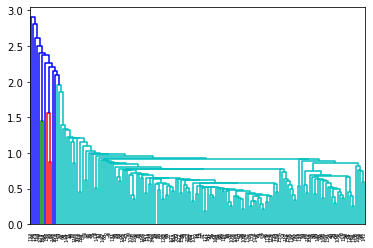

In [43]:
# Single Linkage: Dendogram

mergings = linkage(df_scaled, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

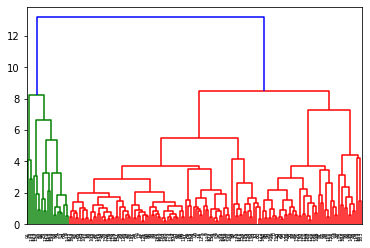

In [44]:
# Complete Linkage: Dendogram

mergings = linkage(df_scaled, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [45]:
df_hc = df.copy()
df_hc = df_hc.drop('cluster_id',axis=1)
df_hc.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0


In [46]:
# Using complete linkage for Hierarchical Clustering
# 3 clusters
cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 1, 1, 0, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 0,
       1, 2, 1, 0, 0, 1, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       2, 1, 1, 1, 1, 0, 0, 1, 1, 2, 2, 0, 0, 1, 2, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 2, 1, 1, 1, 0, 2, 1, 1, 1, 1, 1, 1, 0, 0, 2, 1, 0, 1, 1, 0,
       0, 1, 1, 2, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       2, 1, 0, 0, 2, 1, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 2, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 2, 2, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 2, 1, 2, 1, 1, 1, 0, 1, 0, 0])

In [47]:
# assigning  cluster labels
df_hc['Cluster_labels'] = cluster_labels
df_hc.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_labels
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,1
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,1


In [48]:
# Number of countries in each cluster
df_hc.Cluster_labels.value_counts(ascending=True)

2    21
0    50
1    96
Name: Cluster_labels, dtype: int64

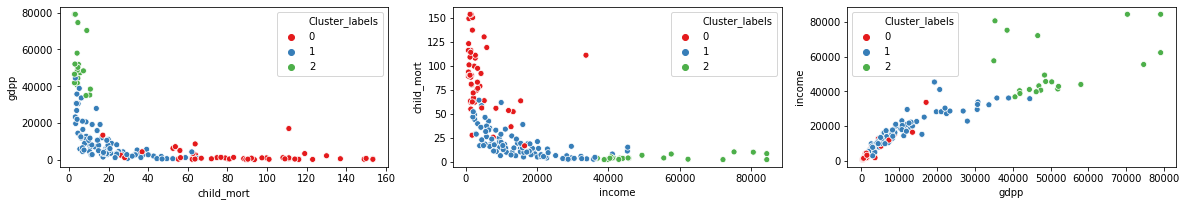

In [49]:
# Scatter plot  to visualize the spread of the data

plt.figure(figsize = (20,10))
plt.subplot(3,3,1)
sns.scatterplot(x = 'child_mort', y = 'gdpp',hue='Cluster_labels', data=df_hc,legend='full',palette="Set1")
plt.subplot(3,3,2)
sns.scatterplot(x = 'income', y = 'child_mort',hue='Cluster_labels',data = df_hc,legend='full',palette="Set1")
plt.subplot(3,3,3)
sns.scatterplot(x = 'gdpp', y = 'income',hue='Cluster_labels', data = df_hc,legend='full',palette="Set1")

plt.show()

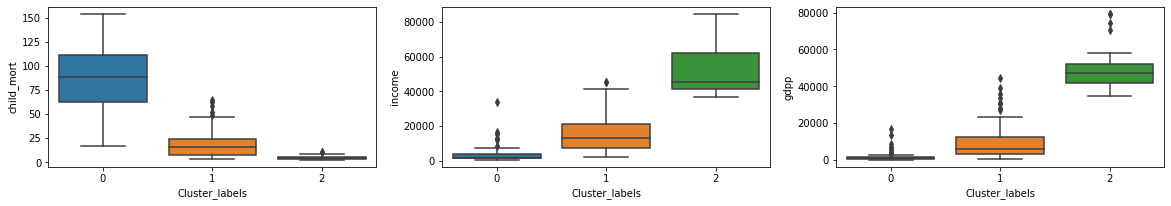

In [50]:
#Box  plot  to visualize the spread of the data

plt.figure(figsize = (20,10))
plt.subplot(3,3,1)
sns.boxplot(x = 'Cluster_labels', y = 'child_mort', data = df_hc)
plt.subplot(3,3,2)
sns.boxplot(x = 'Cluster_labels', y = 'income', data = df_hc)
plt.subplot(3,3,3)
sns.boxplot(x = 'Cluster_labels', y = 'gdpp', data=df_hc)
plt.show()

In [51]:
# Cluster Profiling

df_hc[['gdpp','income','child_mort','Cluster_labels']].groupby('Cluster_labels').mean()

,gdpp,income,child_mort
Cluster_labels,,,
0,2155.840000,4229.169600,87.586000
1,9849.187500,15438.333333,19.188542
2,51289.333333,53421.333333,5.176190


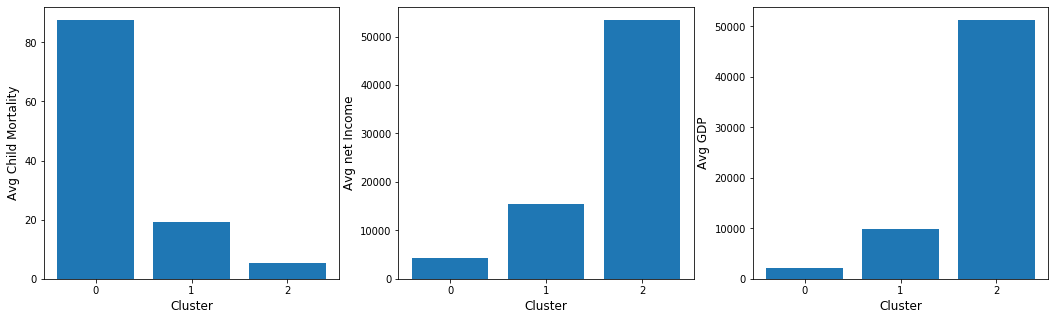

In [52]:
# visualizing with  barplot. 
country_means2 = df_hc[['child_mort','income','gdpp','Cluster_labels']].groupby('Cluster_labels').mean().reset_index().round(2)
x = ['0','1','2']
plt.figure(figsize=(18, 5))
for col in enumerate([['child_mort','Avg Child Mortality'],['income','Avg net Income'],['gdpp','Avg GDP']]):
    plt.subplot(1,3,col[0]+1)
    plt.bar(country_means2.Cluster_labels,country_means2[col[1][0]])
    plt.xlabel('Cluster', fontdict={'fontsize': 12, 'fontweight' : 3, 'color' : 'black'})
    plt.ylabel(col[1][1], fontdict={'fontsize': 12, 'fontweight' : 3, 'color' : 'black'})
    plt.xticks(country_means2.Cluster_labels.to_list(),x)
plt.show()

In [53]:
# Cluster identified 0 

c2 = df_hc[df_hc['Cluster_labels']==0]
c2.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_labels
0,Afghanistan,90.2,55.300,41.9174,248.297,1610.0,9.440,56.2,5.82,553.0,0
3,Angola,119.0,2199.190,100.6050,1514.370,5900.0,22.400,60.1,6.16,3530.0,0
17,Benin,111.0,180.404,31.0780,281.976,1820.0,0.885,61.8,5.36,758.0,0
21,Botswana,52.5,2768.600,527.0500,3257.550,13300.0,8.920,57.1,2.88,6350.0,0
25,Burkina Faso,116.0,110.400,38.7550,170.200,1430.0,6.810,57.9,5.87,575.0,0


In [54]:
c2.sort_values(by = ['gdpp', 'child_mort', 'income'], ascending = [True, False, True]).head(5)


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_labels
26,Burundi,93.6,22.243716,26.7960,104.90964,764.00,12.30,57.7,6.2600,231.0,0
88,Liberia,89.3,62.457000,38.5860,302.80200,742.24,5.47,60.8,5.0200,327.0,0
37,"Congo, Dem. Rep.",116.0,137.274000,26.4194,165.66400,742.24,20.80,57.5,6.5400,334.0,0
112,Niger,123.0,77.256000,17.9568,170.86800,814.00,2.55,58.8,6.5636,348.0,0
132,Sierra Leone,153.4,67.032000,52.2690,137.65500,1220.00,17.20,55.0,5.2000,399.0,0


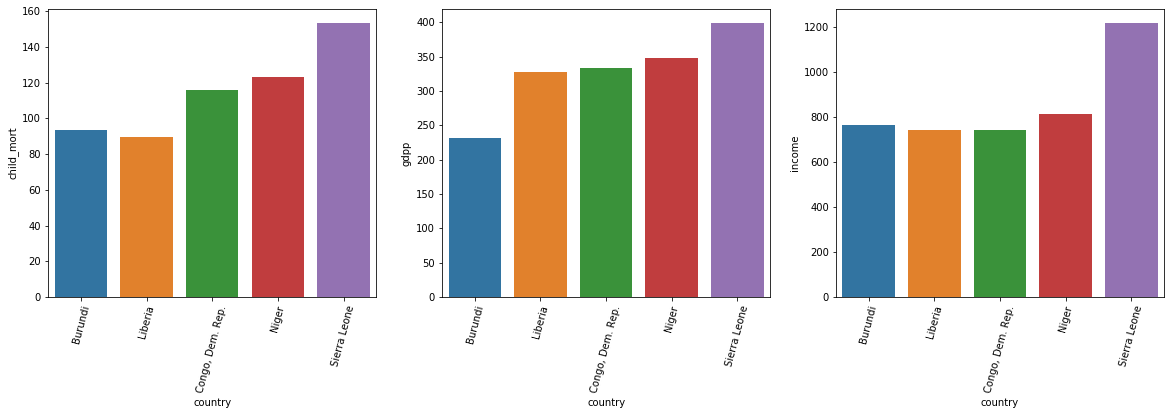

In [55]:
#  visualize the Top 5 countries hich are in need of the aid based on socio-economic factors.

Top_5 = c2.sort_values(by = ['gdpp', 'child_mort', 'income'], ascending = [True, False, True]).head(5)
plt.figure(figsize = (20,18))
plt.subplot(3,3,1)
sns.barplot(x='country', y='child_mort', data= Top_5)
plt.xticks(rotation =75)
plt.subplot(3,3,2)
sns.barplot(x='country', y='gdpp', data= Top_5)
plt.xticks(rotation =75)
plt.subplot(3,3,3)
sns.barplot(x='country', y='income', data= Top_5)
plt.xticks(rotation =75)
plt.show()

#### Top 5 countries after hierarchical clustering are : Burundi, Liberia, Congo, Dem. Rep, Niger, Sierra Leone. These are the countries which are in need of the aid based on socio-economic factors.

## Conclusion

- Similar countries obtained by using   Hierarchical Clustering as well as K-Means Clustering, generated 3 clusters.
- K-means algorithm is simple and it's easy to visualize clusters whereas Hierarchical Clustering - Applying linkages is simple however it is difficult to analyze dendogram.

### Top 5 countries which are in need of the aid based on socio-economic factors  :
- Burundi 
- Liberia
- Congo, Dem. Rep
- Niger 
- Sierra Leone